In [ ]:
%matplotlib inline

In [ ]:
'''
本文件用于测试并读取RAF数据集：
1: Surprise
2: Fear
3: Disgust
4: Happiness
5: Sadness
6: Anger
7: Neutral
'''
import os
import numpy as np
from PIL import Image
import face_recognition
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from utils.face_recognition import crop_face_area_and_get_landmarks, get_img_with_landmarks

# img_data_dir_path = "../data/RAF/Image/aligned"
img_data_dir_path = "../data/RAF/Image/original"
label_data_file_path = "../data/RAF/EmoLabel/list_patition_label.txt"


In [ ]:
# 读取label分类信息
with open(label_data_file_path) as file:
    lines = file.readlines()

In [ ]:
# 将分类信息处理成map
cla_map = {}
cla_num_list = [0, 0, 0, 0, 0, 0, 0, 0]
for line in lines:
    file_name, classification = line.strip().split(" ")
    file_name = file_name.split(".")[0]
#     print(file_name, classification)
    cla_map[file_name] = classification
    cla_num_list[int(classification)] += 1
print("数据集的图片个数：", len(cla_map))
print("各类图片个数：", cla_num_list)

In [ ]:
# 读取图片
img_file_names = os.listdir(img_data_dir_path)
# img_file_names = ['train_03206_aligned.jpg', 'train_03207_aligned.jpg', 'train_03208_aligned.jpg']
for img_file_name in img_file_names:
    img = Image.open(os.path.join(img_data_dir_path, img_file_name)).convert("L")
    img_name_list = img_file_name.split(".")[:-1]
#     img_name_list = img_file_name.split("_")[:-1]
    img_name = img_name_list[0]
    file_type, file_index = img_file_name.strip().split('.')[0].split("_")
    print(file_type, file_index)
    for ele in img_name_list[1:]:
        img_name += "_" + ele
    print(img_name)
    print(img)
    print(cla_map[img_name])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(np.array(img), cmap="gray")
    plt.show()
    img, face_box, face_landmarks = crop_face_area_and_get_landmarks(img)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(np.array(img), cmap="gray")
    plt.show()
    print(face_landmarks)
#     break

测试封装RAF的结果
---

In [1]:
import os
import sys
import torch
sys.path.insert(0, "..")
from dal.RAF_DataSet import RAF
import transforms.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
target_type = 'ls'
input_img_size = 223
# transform_train = transforms.Compose([
#     transforms.Normalize(0.5, 1),
#     transforms.Resize(input_img_size),  # 缩放将图片的最小边缩放为 input_img_size，因此如果输入是费正方形的，那么输出也不是正方形的
#     transforms.RandomCrop(input_img_size),  # 用于将非正方形的图片进行处理
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
# ])
IMG_MEAN = [0.5]
IMG_STD = [0.225]
transform_train = transforms.Compose([
    transforms.Resize(input_img_size),  # 缩放将图片的最小边缩放为 input_img_size，因此如果输入是非正方形的，那么输出也不是正方形的
#     transforms.RandomResizedCrop(input_img_size),  # 用于将非正方形的图片进行处理
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize(IMG_MEAN, IMG_STD),
])
train_data = RAF(is_train=True, img_dir_pre_path="../data/RAF", transform=transform_train, target_type=target_type, using_fl=False)
train_data_fl = RAF(is_train=True, img_dir_pre_path="../data/RAF", transform=transform_train, target_type=target_type, using_fl=True)

loading from pickle file: ../Saved_DataSets/CKPlus_train.pickle
loading over!
train_num:  10385  test_num: 3068


In [12]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=False)
train_loader_fl = torch.utils.data.DataLoader(train_data_fl, batch_size=4, shuffle=False)
itr = enumerate(train_loader)
itr_fl = enumerate(train_loader_fl)

(1, 223, 223)
(1, 223, 223)


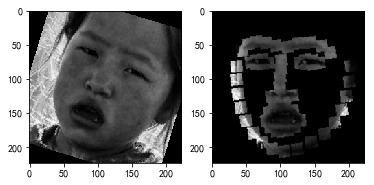

(1, 223, 223)
(1, 223, 223)


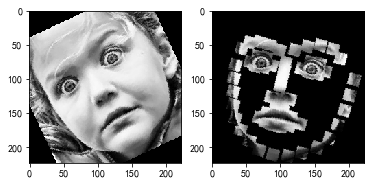

(1, 223, 223)
(1, 223, 223)


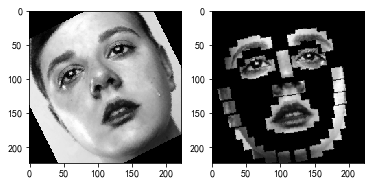

(1, 223, 223)
(1, 223, 223)


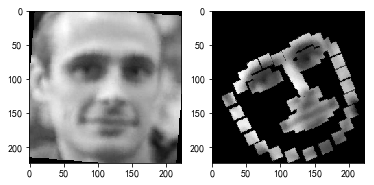

In [14]:
bs, (inputs, targets) = next(itr)
bs, (inputs_fl, targets) = next(itr_fl)
inputs, targets, inputs_fl = inputs.numpy(), targets.numpy(), inputs_fl.numpy()
# print(bs)
# print(inputs)
# print(targets)
# print(boxes)
# print(landmarks)
for index in range(len(inputs)):
    input = inputs[index]
    input_fl = inputs_fl[index]
    print(input.shape)
    arr = input.reshape([input.shape[1], input.shape[2]])
    print(input_fl.shape)
    arr_fl = input_fl.reshape([input_fl.shape[1], input_fl.shape[2]])
    fig = plt.figure()
    ax = fig.add_subplot(121)
    ax.imshow(arr, cmap="gray")
    ax = fig.add_subplot(122)
    ax.imshow(arr_fl, cmap="gray")
    plt.show()

In [8]:
train_data.save()

saving to pickle file: ../Saved_DataSets/CKPlus_train.pickle
saving over!


In [ ]:
import pickle
dump_self_train_path = '../Saved_DataSets/CKPlus_train.pickle'
dump_self_test_path = '../Saved_DataSets/CKPlus_test.pickle'
dump_self_train_fl_path = '../Saved_DataSets/CKPlus_train_fl.pickle'
dump_self_test_fl_path = '../Saved_DataSets/CKPlus_test_fl.pickle'

In [ ]:
if not os.path.exists('../Saved_DataSets'):
    os.mkdir('../Saved_DataSets')
def save(obj, path):
    with open(path, 'wb') as f:
        # Pickle the class using the highest protocol available.
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load(path):
    obj = None
    with open(path, 'rb') as f:
        # The protocol version used is detected automatically, so we do not have to specify it.
        obj = pickle.load(f)
    return obj

In [ ]:
other = load(dump_self_train_fl_path)
other_loader = torch.utils.data.DataLoader(other, batch_size=4, shuffle=False)
print(type(other))
itr = enumerate(other_loader)
bs, (inputs, targets) = next(itr)
inputs, targets = inputs.numpy(), targets.numpy()
for index in range(len(inputs)):
    input = inputs[index]
    print(input.shape)
    arr = input.reshape([input.shape[1], input.shape[2]])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(arr, cmap="gray")
    plt.show()